In [1]:
# Ignore warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Computations
import itertools

# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import KFold, cross_val_score

# Visualization
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Load the training, test and validation files
train=pd.read_csv('./liar_plus_dataset/dataset/tsv/train2.tsv',delimiter='\t',encoding='utf-8', header=None)
test=pd.read_csv('./liar_plus_dataset/dataset/tsv/test2.tsv',delimiter='\t',encoding='utf-8', header=None)
valid=pd.read_csv('./liar_plus_dataset/dataset/tsv/val2.tsv',delimiter='\t',encoding='utf-8', header=None)

# Create table headers    
train.columns = ['values','id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue','extracted_justification']
test.columns = ['values','id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue','extracted_justification']
valid.columns = ['values','id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue','extracted_justification']

In [3]:
df = pd.DataFrame()
df = train.append(valid).sample(frac = 1, random_state = 1)
df.index = range(len(train) + len(valid))

In [4]:
df

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification
0,109.0,4702.json,true,Says for every dollar the state spent on audit...,government-efficiency,kate-brown,Secretary of State,Oregon,democrat,1.0,0.0,0.0,0.0,0.0,a speech at the Oregon Summit.,But back to the ruling statement. Brown said t...
1,1327.0,8835.json,false,I played in a game here against the Pittsburgh...,sports,curtis-martin,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,comments on ESPN,"But that's not supported by the facts. Yes, th..."
2,8888.0,4160.json,true,Florida Democrats put my Social Security numbe...,campaign-advertising,allen-west,"U.S. representative, Florida District 22",Florida,republican,6.0,9.0,3.0,1.0,4.0,a Fox News interview,Jolly said that under a new federal regulation...
3,897.0,9464.json,half-true,There are 278 Republicans in Congress. (With E...,"congress,diversity,religion",bill-maher,Host of Real Time with Bill Maher,California,independent,0.0,3.0,1.0,5.0,0.0,"a ""Real Time with Bill Maher"" episode","Without Cantor, Maher said, the GOP in Congres..."
4,7898.0,13200.json,half-true,"Says Donald Trump, in his campaign announcemen...","candidates-biography,diversity,immigration",mike-pence,Governor,Indiana,republican,8.0,10.0,12.0,5.0,0.0,"the vice presidential debate in Farmville, Va.",McCain said the Syrian civil war has turned 1 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11521,7841.0,6383.json,half-true,"As a congressman, Mark Neumann voted four time...","debt,deficit,federal-budget,message-machine-2012",eric-hovde,NaN,NaN,republican,2.0,3.0,3.0,0.0,0.0,a television ad,"""I would be hard-pressed to come up with a con..."
11522,713.0,2979.json,half-true,All but one of the 50 states already have some...,"federal-budget,state-budget",john-cornyn,Senator,Texas,republican,5.0,3.0,6.0,2.0,1.0,an op-ed,"Only two states not 49, as Cornyn says have ..."
11523,905.0,10227.json,half-true,"Over the last few years, weve put more people ...","economy,jobs,labor,workers",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference after the G20 summit,"Obama said, ""Over the last few years, weve put..."
11524,5204.0,2295.json,true,On the mosque near ground zero.,religion,nathan-deal,NaN,NaN,republican,9.0,5.0,11.0,11.0,0.0,a newspaper article,Rosen has only been quoted a handful of times ...


In [5]:
df['total'] = df['statement'] + ' ' + df['extracted_justification'] 
df.head()

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification,total
0,109.0,4702.json,true,Says for every dollar the state spent on audit...,government-efficiency,kate-brown,Secretary of State,Oregon,democrat,1.0,0.0,0.0,0.0,0.0,a speech at the Oregon Summit.,But back to the ruling statement. Brown said t...,Says for every dollar the state spent on audit...
1,1327.0,8835.json,false,I played in a game here against the Pittsburgh...,sports,curtis-martin,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,comments on ESPN,"But that's not supported by the facts. Yes, th...",I played in a game here against the Pittsburgh...
2,8888.0,4160.json,true,Florida Democrats put my Social Security numbe...,campaign-advertising,allen-west,"U.S. representative, Florida District 22",Florida,republican,6.0,9.0,3.0,1.0,4.0,a Fox News interview,Jolly said that under a new federal regulation...,Florida Democrats put my Social Security numbe...
3,897.0,9464.json,half-true,There are 278 Republicans in Congress. (With E...,"congress,diversity,religion",bill-maher,Host of Real Time with Bill Maher,California,independent,0.0,3.0,1.0,5.0,0.0,"a ""Real Time with Bill Maher"" episode","Without Cantor, Maher said, the GOP in Congres...",There are 278 Republicans in Congress. (With E...
4,7898.0,13200.json,half-true,"Says Donald Trump, in his campaign announcemen...","candidates-biography,diversity,immigration",mike-pence,Governor,Indiana,republican,8.0,10.0,12.0,5.0,0.0,"the vice presidential debate in Farmville, Va.",McCain said the Syrian civil war has turned 1 ...,"Says Donald Trump, in his campaign announcemen..."


In [6]:
test['total'] = test['statement'] + ' ' + test['extracted_justification']
test.head()

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification,total
0,0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w...",Building a wall on the U.S.-Mexico border will...
1,1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...,Wisconsin is on pace to double the number of l...
2,2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he...",Says John McCain has done nothing to help the ...
3,3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ...",Suzanne Bonamici supports a plan that will cut...
4,4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...,When asked by a reporter whether hes at the ce...


In [7]:
df = df.dropna()
test = test.dropna()

In [8]:
truth_ = {'pants-fire':5, 'false':4, 'barely-true':3, 'half-true':2, 'mostly-true':1, 'true':0}
df['lblClass'] = df['label'].apply(lambda x: truth_[x])
test['lblClass'] = test['label'].apply(lambda x: truth_[x])

In [9]:
cv = KFold(n_splits=5, random_state=1,shuffle=True)

In [10]:
X_train = df['total']
y_train = df['lblClass']
X_test = test['total']
y_test = test['lblClass']

In [14]:
for i in range(6):
    print(df[df['lblClass'] == i].count())

values                     1269
id                         1269
label                      1269
statement                  1269
subject                    1269
speaker                    1269
job                        1269
state                      1269
party                      1269
barely_true_c              1269
false_c                    1269
half_true_c                1269
mostly_true_c              1269
pants_on_fire_c            1269
venue                      1269
extracted_justification    1269
total                      1269
lblClass                   1269
dtype: int64
values                     1529
id                         1529
label                      1529
statement                  1529
subject                    1529
speaker                    1529
job                        1529
state                      1529
party                      1529
barely_true_c              1529
false_c                    1529
half_true_c                1529
mostly_true_c              

In [15]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [16]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [17]:
# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
def precision_recall(true_label, predicted_label):
    precision = precision_score(true_label, predicted_label,average='macro')
    print('Precision: %f' % precision)

    recall = recall_score(true_label, predicted_label, average='macro')
    print('Recall: %f' % recall)
    
    accuracy = metrics.accuracy_score(true_label, predicted_label)
    print('Accuracy: %f' % accuracy)
    
    f1score = metrics.f1_score(true_label, predicted_label, average='macro')
    print('F1 Score: %f' % f1score)

In [29]:
nb_classifier_k = MultinomialNB(alpha=0.1)
scores = cross_val_score(nb_classifier_k, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier_k.fit(count_train, y_train)
pred_nb_c = nb_classifier_k.predict(count_test)
precision_recall(y_test, pred_nb_c)

0.18001755988228701 0.004806172174291383
Precision: 0.224252
Recall: 0.194195
Accuracy: 0.223793
F1 Score: 0.190752


In [30]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    precision_recall(y_test, pred_tune)
    print("Alpha: {:.2f} ".format(alpha))

Precision: 0.186806
Recall: 0.191658
Accuracy: 0.223793
F1 Score: 0.186341
Alpha: 0.00 
Precision: 0.229224
Recall: 0.213094
Accuracy: 0.234393
F1 Score: 0.214964
Alpha: 0.05 
Precision: 0.224252
Recall: 0.194195
Accuracy: 0.223793
F1 Score: 0.190752
Alpha: 0.10 
Precision: 0.182061
Recall: 0.189117
Accuracy: 0.222615
F1 Score: 0.181264
Alpha: 0.15 
Precision: 0.185369
Recall: 0.191794
Accuracy: 0.226148
F1 Score: 0.183519
Alpha: 0.20 
Precision: 0.182903
Recall: 0.191598
Accuracy: 0.227326
F1 Score: 0.180968
Alpha: 0.25 
Precision: 0.187810
Recall: 0.195281
Accuracy: 0.232038
F1 Score: 0.183928
Alpha: 0.30 
Precision: 0.184594
Recall: 0.191602
Accuracy: 0.228504
F1 Score: 0.179070
Alpha: 0.35 
Precision: 0.185921
Recall: 0.191741
Accuracy: 0.229682
F1 Score: 0.177435
Alpha: 0.40 
Precision: 0.185675
Recall: 0.191912
Accuracy: 0.230860
F1 Score: 0.175152
Alpha: 0.45 
Precision: 0.189128
Recall: 0.192384
Accuracy: 0.232038
F1 Score: 0.173751
Alpha: 0.50 
Precision: 0.186939
Recall: 0.19

0.21708523602158367 0.010658100009326217
Precision: 0.202866
Recall: 0.199108
Accuracy: 0.241461
F1 Score: 0.175870


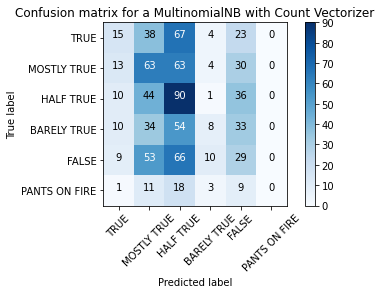

In [33]:
# Let's re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.70)
scores = cross_val_score(nb_classifier, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
precision_recall(y_test, pred_nb_count)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1,2,3,4,5])
    
plot_confusion_matrix(cm, classes=['TRUE', 'MOSTLY TRUE', 'HALF TRUE', 'BARELY TRUE', 'FALSE', 'PANTS ON FIRE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

0.2148266292526461 0.014010834484746479
Precision: 0.199121
Recall: 0.187920
Accuracy: 0.208481
F1 Score: 0.188835


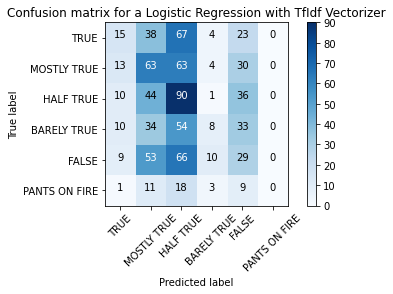

In [34]:
logreg = LogisticRegression(C=1e5)
scores = cross_val_score(logreg, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
precision_recall(y_test, pred_logreg_tfidf)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1,2,3,4,5])
    
plot_confusion_matrix(cm, classes=['TRUE', 'MOSTLY TRUE', 'HALF TRUE', 'BARELY TRUE', 'FALSE', 'PANTS ON FIRE'], title ='Confusion matrix for a Logistic Regression with TfIdf Vectorizer')

0.19410146788262234 0.005713066324484005
Precision: 0.167680
Recall: 0.166902
Accuracy: 0.181390
F1 Score: 0.166601


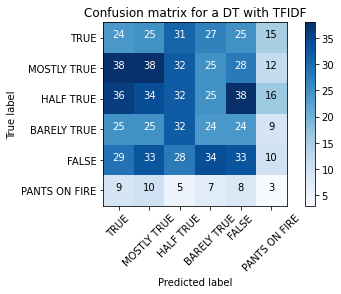

In [35]:
dtclass = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = cross_val_score(dtclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
dtclass.fit(tfidf_train, y_train)
pred_dt_count = dtclass.predict(tfidf_test)
precision_recall(y_test, pred_dt_count)

cm5 = metrics.confusion_matrix(y_test, pred_dt_count, labels=[0,1,2,3,4,5])
plot_confusion_matrix(cm5, classes=['TRUE', 'MOSTLY TRUE', 'HALF TRUE', 'BARELY TRUE', 'FALSE', 'PANTS ON FIRE'], title ='Confusion matrix for a DT with TFIDF')

0.21070764560804403 0.008766027599252208
Precision: 0.179984
Recall: 0.188351
Accuracy: 0.219081
F1 Score: 0.182094


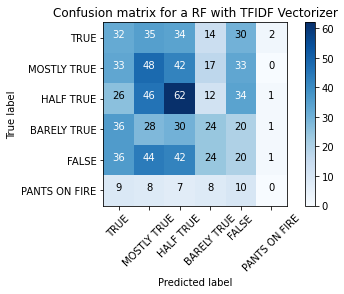

In [36]:
rfclass = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
scores = cross_val_score(rfclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
rfclass.fit(tfidf_train, y_train)
pred_rf_count = rfclass.predict(tfidf_test)
precision_recall(y_test, pred_rf_count)

cm6 = metrics.confusion_matrix(y_test, pred_rf_count, labels=[0,1,2,3,4,5])
plot_confusion_matrix(cm6, classes=['TRUE', 'MOSTLY TRUE', 'HALF TRUE', 'BARELY TRUE', 'FALSE', 'PANTS ON FIRE'], title ='Confusion matrix for a RF with TFIDF Vectorizer')

0.22253188795206774 0.01727544152862849
Precision: 0.168276
Recall: 0.181396
Accuracy: 0.216726
F1 Score: 0.168012


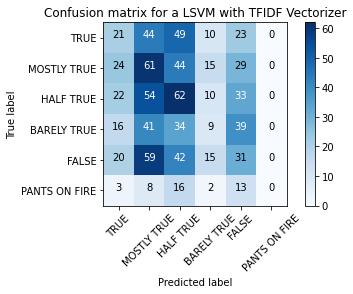

In [37]:
svclass = SVC(kernel = 'linear', random_state = 0)
scores = cross_val_score(svclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
svclass.fit(tfidf_train, y_train)
pred_sv_count = svclass.predict(tfidf_test)
precision_recall(y_test, pred_sv_count)

cm6 = metrics.confusion_matrix(y_test, pred_sv_count, labels=[0,1,2,3,4,5])
plot_confusion_matrix(cm6, classes=['TRUE', 'MOSTLY TRUE', 'HALF TRUE', 'BARELY TRUE', 'FALSE', 'PANTS ON FIRE'], title ='Confusion matrix for a LSVM with TFIDF Vectorizer')

0.19622665484242433 0.013740470607084368
Precision: 0.192124
Recall: 0.192129
Accuracy: 0.216726
F1 Score: 0.187382


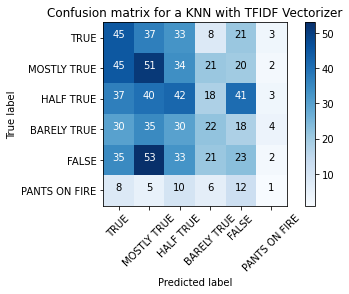

In [38]:
knnclass = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scores = cross_val_score(knnclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
knnclass.fit(tfidf_train, y_train)
pred_knn_count = knnclass.predict(tfidf_test)
precision_recall(y_test, pred_knn_count)

cm6 = metrics.confusion_matrix(y_test, pred_knn_count, labels=[0,1,2,3,4,5])
plot_confusion_matrix(cm6, classes=['TRUE', 'MOSTLY TRUE', 'HALF TRUE', 'BARELY TRUE', 'FALSE', 'PANTS ON FIRE'], title ='Confusion matrix for a KNN with TFIDF Vectorizer')